# Tarea 17
__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?
#### SOLUCIÓN

Sea $f(x)$ infinitamente diferenciable, por el teorema de Taylor se tiene que:
$$f(x)=\sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^n$$
Entonces, dada una matriz $A$ se puede evaluar $f(x)$ en ella como:
$$f(A)=\sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}A^n$$

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

Sea $A_{mxn}$ una matriz de m renglones y n columnas, $A$ es simétrica si: $A^{T}=A$, donde $A^{T}$ es la matriz transpuesta de $A$.

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Sea $A_{nxn}$ una matriz cuadrada. Notemos que $A+A^T$ es una matriz simétrica, pues sus entradas son son $a_{i,j}+a_{j,i}$ al sacar la matriz transpuesta las entradas son $a_{j,i}+a_{i,j}$, las cuales son iguales en los reales.

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.
* Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.

__Nota 1:__ De momento no utilicen `expm`.

__Nota 2:__ El operador `*` funciona para multiplicar matrices.

__Note 3:__ Observen que la matriz $A$ no es simétrica, aqui no se cumple que $w^T=w^{-1}$.

#### SOLUCIÓN

In [14]:
#Se define la matriz A y el intervalo de tiempo sobre el que se encontrará la solución.
timeList = 0:0.1:100;
A=[-1 1; -1 -1]

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [20]:
#Definimos una función para elegir un número aleatorio posteriormente
function random(z)
    return z*(2*rand(1)-1)
end

random (generic function with 1 method)

In [21]:
#Diagonalizamos la matriz y guardamos la matriz de eigenvectores en w
diagA=diagm(eigvals(A));
w=eigvecs(A);

In [22]:
using PyPlot

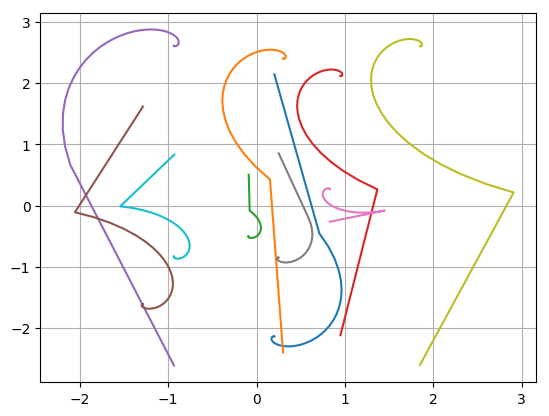

In [23]:
#GRAFICAMOS:
grid("on")

for j in 1:10 #Se itera sobre condiciones inciales

x0=[random(2), random(3)]; #condicion inicial aleatoria
x=x0                       #Vectores solución por cada tiempo
h=timeList[2]-timeList[1]  #tamaño de cada subintervalo
listx=[]                    #Guardamos todas las soluciones dependientes del tiempo

push!(listx,x)

for i in 2:length(timeList)  #Se itera sobre el tiempo
    t = i*h
    x = (w*exp.(t*diagA)*inv(w))*x0;
    push!(listx,x) 
end
#Hacemos una lista de x e y para graficarlos:
xList=real(map(x->x[1],listx));
yList=real(map(x->x[2],listx));

plot(xList, yList);
end